https://courspython.com/introduction-courbes.html#formats-de-courbes
https://moncoachdata.com/blog/matplotlib-visualisation-de-donnees/

# Qualité de l'air - Bretagne

La pollution de l'air pose un risque sérieux dans le monde entier. Les villes sont étouffées par le smog et les émissions dangereuses, qui nuisent à la fois à l'environnement et à la santé des populations mondiales. La région Bretagne a donc besoin de différents outils pour suivre et analyser la pollution atmosphérique à l'échelle de la région. Elle vous demande de l'aide afin de constituer une analyse d'un jeu de données qu'elle possède.

L'objectif de cette étude est d'identifier le jeu de données:

Suite à la pandémie de COVID-19 qui a débuté au début de l'année 2020, la région souhaite connaître l'impact du confinement sur la pollution atmosphérique dans la région.

    * Réaliser un Notebook qui importe les données.
    * Mettre en forme et traiter les données en vue d'une cartographie.
    * Interpréter les résultats (et pas juste leur affichage)



# Présentation du fichier

le jeu de données nous présente l'ensemble des valeurs d'indice d'Air en Bretagne à l'échelle des agglomérations sur l'année 2020 et l'année en cours.

L‘indice de la Qualité de l’air est un indicateur journalier prévisionnel qui permet de caractériser de manière simple et globale la qualité de l’air d’une zone géographique déterminée.

Les donneées proviennent du site: https://data.airbreizh.asso.fr/contenu/services_didon.html#










# 1. Traitement des données

### Importation des bibliothèques

In [1]:
#importation des bibliothèques
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from pyproj import Proj, transform
import re

### Importation et ouverture du jeu de données

In [2]:
dataset = pd.read_csv('airbis.csv', sep=',')
dataset.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bc,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bd,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_17768845bf9_60be,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bf,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_17768845bf9_60c0,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [3]:
dataset.shape

(2547, 15)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FID        2547 non-null   object
 1   date_ech   2547 non-null   object
 2   valeur     2547 non-null   int64 
 3   qualif     2547 non-null   object
 4   source     2547 non-null   object
 5   type_zone  2547 non-null   object
 6   code_zone  2547 non-null   int64 
 7   lib_zone   2547 non-null   object
 8   val_no2    2547 non-null   int64 
 9   val_so2    2547 non-null   int64 
 10  val_o3     2547 non-null   int64 
 11  val_pm10   2547 non-null   int64 
 12  val_pm25   2547 non-null   int64 
 13  geom       2547 non-null   object
 14  couleur    2547 non-null   object
dtypes: int64(7), object(8)
memory usage: 298.6+ KB


In [5]:
dataset.isnull().sum()

FID          0
date_ech     0
valeur       0
qualif       0
source       0
type_zone    0
code_zone    0
lib_zone     0
val_no2      0
val_so2      0
val_o3       0
val_pm10     0
val_pm25     0
geom         0
couleur      0
dtype: int64

Notre fichier ne comporte pas de valeurs manquantes

### Affichage des variables quantitatives

In [6]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['valeur', 'code_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10', 'val_pm25']


### Affichage des variables catégorielles

In [7]:
variables = (dataset.dtypes == 'object')
object_cols = list(variables[variables].index)


print('There are {} categorical variables\n'.format(len(object_cols)))

print('The categorical variables are :', object_cols)

There are 8 categorical variables

The categorical variables are : ['FID', 'date_ech', 'qualif', 'source', 'type_zone', 'lib_zone', 'geom', 'couleur']


### Détail des variables catégorielles

In [8]:

#Nombre des labels des variables catégorielles
for var in object_cols:
    print(f"{var} contains {len(dataset[var].unique())} labels")

FID contains 2547 labels
date_ech contains 367 labels
qualif contains 5 labels
source contains 1 labels
type_zone contains 1 labels
lib_zone contains 7 labels
geom contains 7 labels
couleur contains 7 labels


In [9]:
#On détermine le nombre d'occurrences de nos variables qualitatives

for var in object_cols:
    print(var)
    print("***********************************************")
    print(dataset[var].value_counts())
    print("==============================================")


FID
***********************************************
ind_bretagne_agglo.fid--15c6355_17768845bf9_67a8    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_659f    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_63fd    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_6174    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_6719    1
                                                   ..
ind_bretagne_agglo.fid--15c6355_17768845bf9_6349    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_665e    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_670e    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_62d2    1
ind_bretagne_agglo.fid--15c6355_17768845bf9_6290    1
Name: FID, Length: 2547, dtype: int64
date_ech
***********************************************
2020-04-14T10:00:00    7
2021-01-01T10:00:00    7
2020-02-28T10:00:00    7
2020-08-25T10:00:00    7
2020-12-19T10:00:00    7
                      ..
2020-03-10T10:00:00    6
2020-01-28T10:00:00    6
2020-02-18T10:00:00    6
2020-02-25T10:00:00    2
2020-02-1

# Interprétation de notre jeu de données

Notre jeu de données comporte 2547 enregistrements (lignes) et 15 colonnes sans valeurs manquantes.
On a 7 variables numériques et 8 variables Catégorielles.

### **Décomposition du fichier**

* **lib_zone**: zone géographique( nom de l'agglomération conconcerné par l'indice) décomposée en 7 zones pour la bretagne:
        CA Quimper Bretagne Occidentale                        
        CA Saint-Brieuc Armor                                  
        CA Lorient                                             
        CA Golfe du Morbihan - Vannes                          
        CA du Pays de Saint-Malo (Saint-Malo Agglomération)    
        Rennes Métropole                                       
        Brest Métropole 
        
* **code_zone** : Identifiant unique de l'agglomération concernée par l'indice.
    
* **Qualif** : cet indice qualifie l’état de l’air selon 5 classes : Bon / Moyen / Médiocre / mauvais / Très bon.
        On associe à la variable Qualif, la variable numérique valeur.

* **valeur** : Valeur de l'indice de la qualité de l'air, compris entre 1 et 10, ou null si absent.

* **date_ech** : date de l'indice au format aaaa-mm-ddTHH:MM:SSZ

* **source** : texte décrivant la source des données c'est-à-dire "Air Breizh"

* **type_zone** : texte décrivant le type de zone considérée (ici 'EPCI', c'est à dire, un établissement public
de coopération intercommunale qui est une structure administrative française regroupant plusieurs communes.
                                                              
* **couleur** : code hexadecimal **couleur** associé à la valeur de l'indice au format #RRVVBB.le code couleur s’étend désormais du bleu (bon) au magenta (extrêmement mauvais.
                                                                            
* **geom** : Géolocalisation de l'agglomération en projection Lambert 93 (EPSG : 2154).
                                                              
                                                              

Les indicateurs utilisés pour mesurer la qualité de l'air sont les suivants:
                                                              
* **val_no2** : valeur du sous-indice de **dioxyde d'azote**, entier de 1 à 10 ou 0 si absent ou null si non calculé.

* **val_so2** : valeur du sous-indice de **dioxyde de soufre**, entier de 1 à 10 ou 0 si absent ou null si non calculé.

* **val_o3** : valeur du sous-indice d'**ozone**, entier de 1 à 10 ou 0 si absent ou null si non calculé.

* **val_pm10** : valeur du sous-indice de **particules fines de diamètre inférieur à 10µm**, entier de 1 à 10 ou 0 si absent ou null si non calculé.

* **val_pm25** : valeur du sous-indice de **particules fines de diamètre inférieur à 2.5µm**, entier de 1 à 10 ou 0 si absent ou null si non calculé.

    
Les concentrations moyennes annuelles sont issues du réseau fixe des principaux polluants réglementés
dans l’air sur la région {nom_région}: dioxyde de soufre SO2, monoxyde d’azote NO et dioxyde d’azote NO2, 
particules en suspension PM10, particules en suspension PM2.5, ozone O3, benzène C6H6, monoxyde de carbone CO. 
Toutes les données fournies sont en μg/m³ (microgramme par mètre cube) sauf CO (mg/m³).
                                                                            
                       


        
        

In [10]:
dataset.corr()


,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
valeur,1.000000,0.018712,-0.046354,NaN,0.766629,0.623687,NaN
code_zone,0.018712,1.000000,0.075305,NaN,-0.022182,0.105371,NaN
val_no2,-0.046354,0.075305,1.000000,NaN,-0.085170,0.099260,NaN
val_so2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val_o3,0.766629,-0.022182,-0.085170,NaN,1.000000,0.274984,NaN
val_pm10,0.623687,0.105371,0.099260,NaN,0.274984,1.000000,NaN
val_pm25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


on constate une corrélation plus marquée entre la variable qualité de l'air ("valeur") et 
val_o3 (indicateur d'ozone) avec une corrélation de 0.77.
La corrélation est également bonne (0.62) entre notre indice de qualité de l'air ("valeur") et val_pm10 
(indicateur de particules fines de diamètre inférieur à 10µm).
        
La corrélation est nulle ou inexistante entre la qualité de l'air et les autres variables.

### Formatage de la variable date_ech

Nous devons formater la variable date_ech qui est au format aaaa-mm-ddTHH:MM:SS afin de la rendre exploitable

In [11]:
# Formater les dates

date = []
for col, row in dataset['date_ech'].iteritems():
    row = row.split('T')[0]
    date.append(row)
dataset.insert(2, "date", date, True)

dataset['date'] = pd.to_datetime(dataset['date'])

dataset['Month'] = dataset['date'].dt.month

dataset.head()



,FID,date_ech,date,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,Month
0,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bc,2021-01-01T10:00:00,2021-01-01,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
1,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bd,2021-01-01T10:00:00,2021-01-01,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,1
2,ind_bretagne_agglo.fid--15c6355_17768845bf9_60be,2021-01-01T10:00:00,2021-01-01,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,1
3,ind_bretagne_agglo.fid--15c6355_17768845bf9_60bf,2021-01-01T10:00:00,2021-01-01,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,1
4,ind_bretagne_agglo.fid--15c6355_17768845bf9_60c0,2021-01-01T10:00:00,2021-01-01,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,1


### Récupération du libéllé du mois

In [12]:
#dataset["Mois"] = dataset["date"].dt.month_name()
#dataset

### retrait des variables inutiles

nous allons supprimer les variables non pertinentes à notre étude, à savoir: FID, date_ech,source,type_zone

In [13]:
dataset1 = dataset.drop(['FID', 'date_ech', 'code_zone', 'source'], axis=1)

dataset1


,date,valeur,qualif,type_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,Month
0,2021-01-01,3,Bon,EPCI,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
1,2021-01-01,3,Bon,EPCI,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,1
2,2021-01-01,3,Bon,EPCI,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,1
3,2021-01-01,3,Bon,EPCI,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,1
4,2021-01-01,3,Bon,EPCI,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2020-01-01,3,Bon,EPCI,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
2543,2020-01-01,3,Bon,EPCI,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600,1
2544,2020-01-01,3,Bon,EPCI,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600,1
2545,2020-01-01,3,Bon,EPCI,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600,1


In [14]:
dataset1.shape

(2547, 13)

In [15]:
dataset1.describe()

,valeur,val_no2,val_so2,val_o3,val_pm10,val_pm25,Month
count,2547.000000,2547.000000,2547.0,2547.000000,2547.000000,2547.0,2547.000000
mean,3.721633,1.257951,0.0,3.517472,2.755791,0.0,6.536317
std,0.887116,0.526414,0.0,0.840821,1.115854,0.0,3.449637
min,2.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
25%,3.000000,1.000000,0.0,3.000000,2.000000,0.0,4.000000
50%,4.000000,1.000000,0.0,3.000000,3.000000,0.0,7.000000
75%,4.000000,1.000000,0.0,4.000000,3.000000,0.0,10.000000
max,8.000000,4.000000,0.0,7.000000,8.000000,0.0,12.000000


# Visualisation des données

### Répartition de la qualité de l'air au global pour l'année 2020.

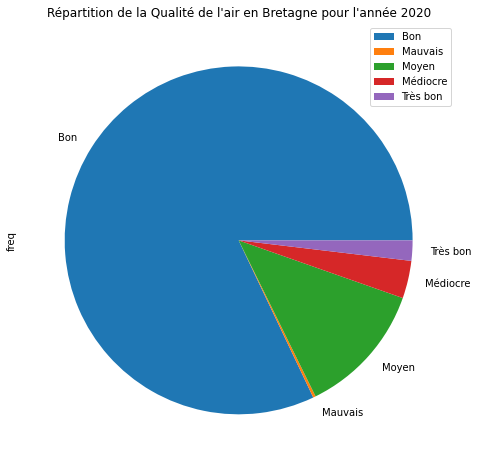

In [16]:
t = pd.crosstab(dataset1.qualif, "freq")
t.plot.pie(subplots=True, figsize = (8,8))
plt.title("Répartition de la Qualité de l'air en Bretagne pour l'année 2020")
plt.legend()

In [17]:
t = pd.crosstab(dataset1.lib_zone, dataset1.qualif)
#t.plot.bar()
t

qualif,Bon,Mauvais,Moyen,Médiocre,Très bon
lib_zone,,,,,
Brest Métropole,303,1,37,17,3
CA Golfe du Morbihan - Vannes,302,0,50,8,5
CA Lorient,302,0,53,7,3
CA Quimper Bretagne Occidentale,310,0,37,14,5
CA Saint-Brieuc Armor,297,2,42,14,10
CA du Pays de Saint-Malo (Saint-Malo Agglomération),289,2,47,18,7
Rennes Métropole,287,1,48,11,15


Nous pouvons constater que sur l'ensemble de l'année 2020, la qualité de l'air est plutôt bonne. Les agglomérations
qui ont connu des épisodes de qualité de l'air médiocres sont les agglomérations de Saint Malo et Brest. L'agglomération
de Rennes se démarque un peu avec des épisodes de très bonne qualité de l'air.

### Evolution de la qualité de l'air sur les différentes agglomérations

In [18]:
# Séparation des dataframes pour les graphiques de qualité de l'air en fonction des zones
dataset1_quali_saint_brieuc = dataset1.loc[dataset1['lib_zone'] == 'CA Saint-Brieuc Armor']
dataset1_quali_morbi = dataset1.loc[dataset1['lib_zone'] == 'CA Golfe du Morbihan - Vannes']
dataset1_quali_quimper = dataset1.loc[dataset1['lib_zone'] == 'CA Quimper Bretagne Occidentale']
dataset1_quali_rennes = dataset1.loc[dataset1['lib_zone'] == 'Rennes Métropole']
dataset1_quali_brest = dataset1.loc[dataset1['lib_zone'] == 'Brest Métropole']
dataset1_quali_lorient = dataset1.loc[dataset1['lib_zone'] == 'CA Lorient']
dataset1_quali_malo = dataset1.loc[dataset1['lib_zone'] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)']


dataset1_quali_saint_brieuc


,date,valeur,qualif,type_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,Month
0,2021-01-01,3,Bon,EPCI,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
11,2020-12-31,3,Bon,EPCI,CA Saint-Brieuc Armor,2,0,3,2,0,POINT (269153.2682993477 6832824.934141148),#99E600,12
17,2020-12-30,3,Bon,EPCI,CA Saint-Brieuc Armor,1,0,3,2,0,POINT (269153.2682993477 6832824.934141148),#99E600,12
26,2020-12-29,3,Bon,EPCI,CA Saint-Brieuc Armor,1,0,3,2,0,POINT (269153.2682993477 6832824.934141148),#99E600,12
33,2020-12-28,3,Bon,EPCI,CA Saint-Brieuc Armor,1,0,3,2,0,POINT (269153.2682993477 6832824.934141148),#99E600,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-01-05,3,Bon,EPCI,CA Saint-Brieuc Armor,2,0,3,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
2525,2020-01-04,3,Bon,EPCI,CA Saint-Brieuc Armor,2,0,3,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
2531,2020-01-03,3,Bon,EPCI,CA Saint-Brieuc Armor,1,0,3,2,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
2534,2020-01-02,2,Très bon,EPCI,CA Saint-Brieuc Armor,2,0,2,2,0,POINT (269153.2682993477 6832824.934141148),#5CCB60,1


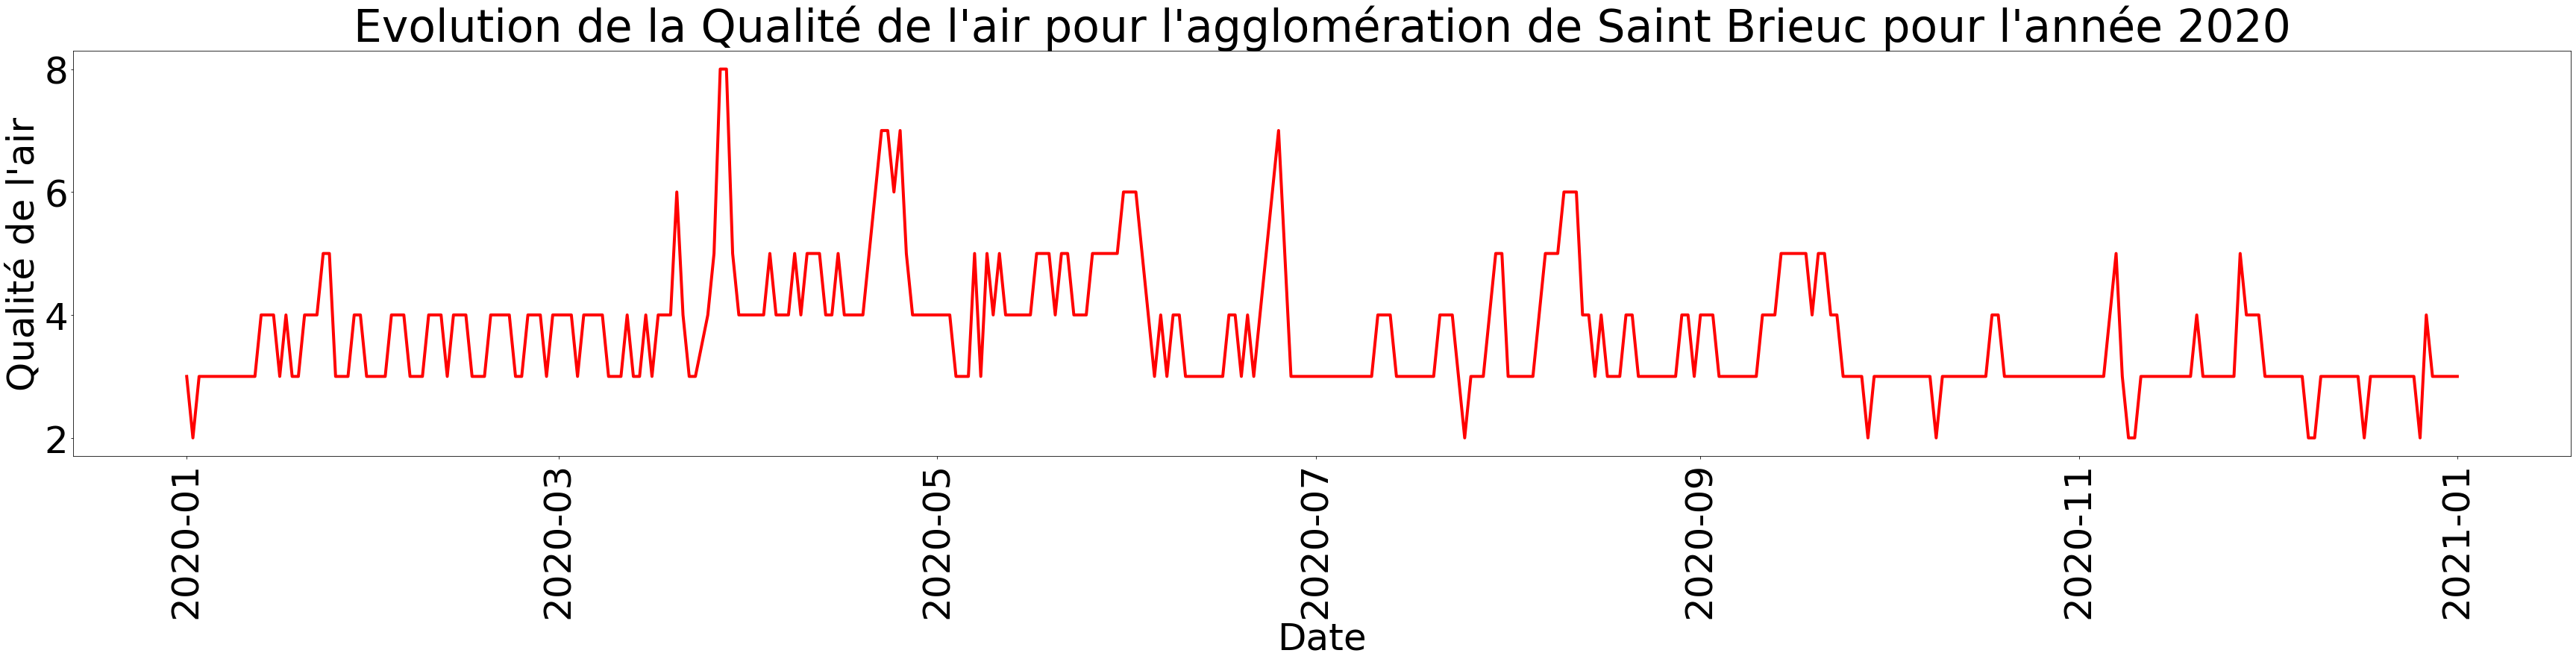

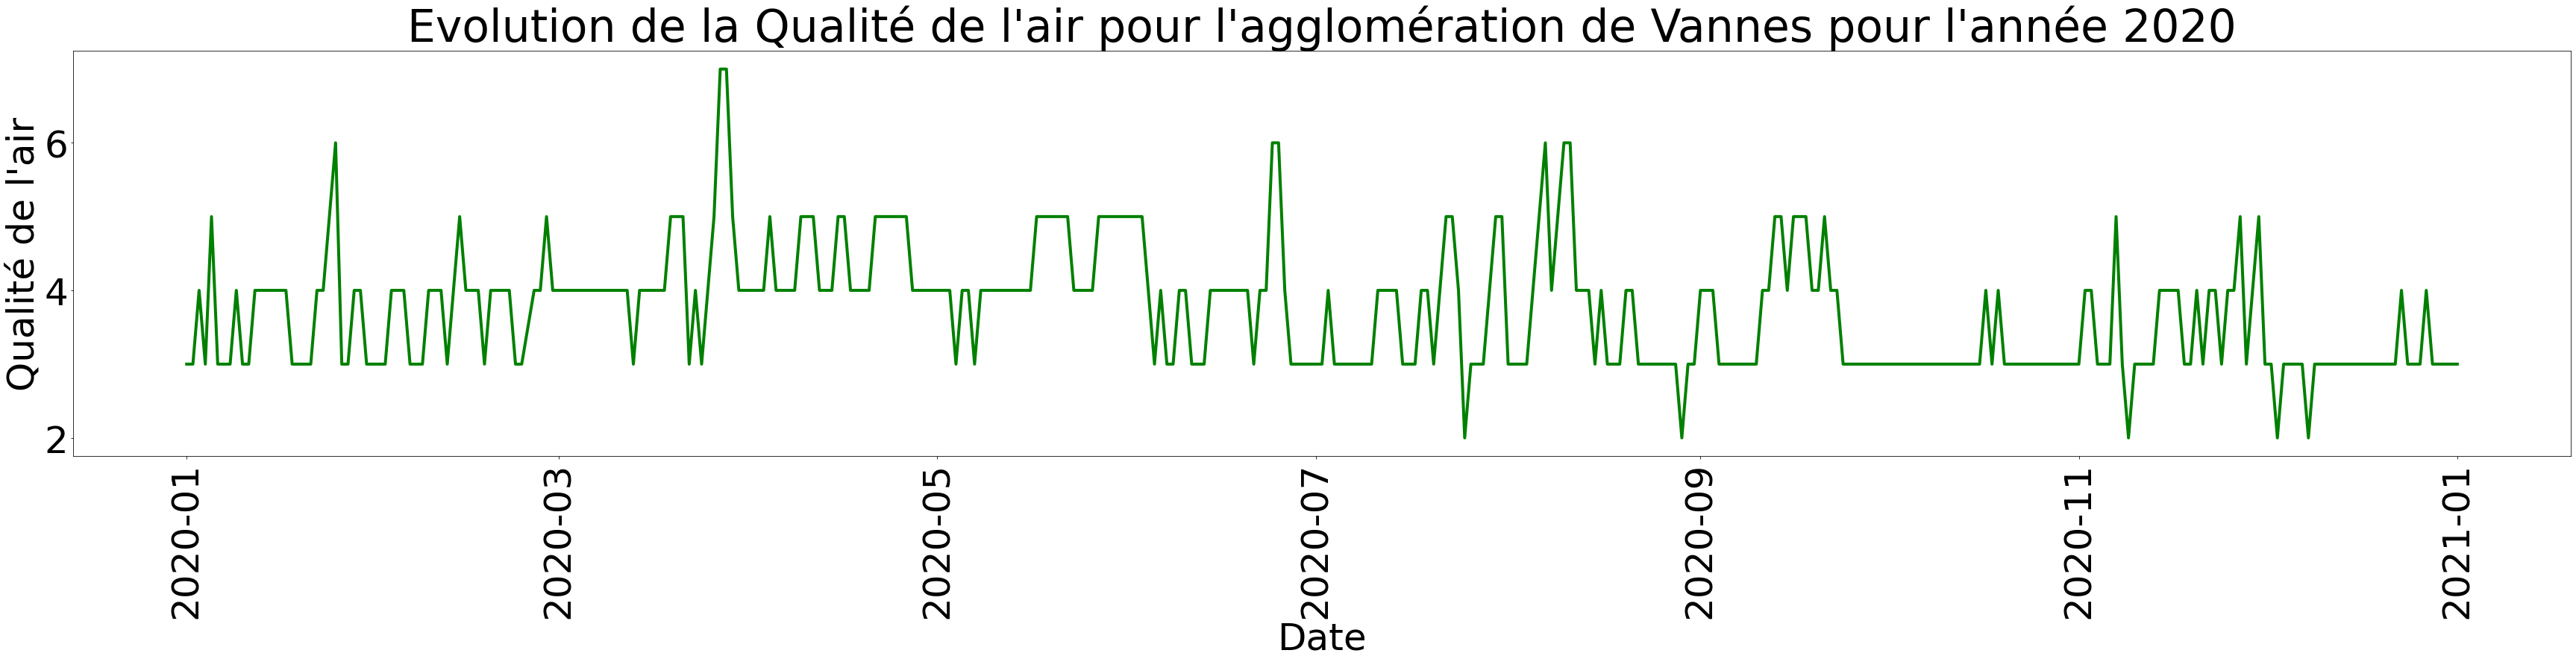

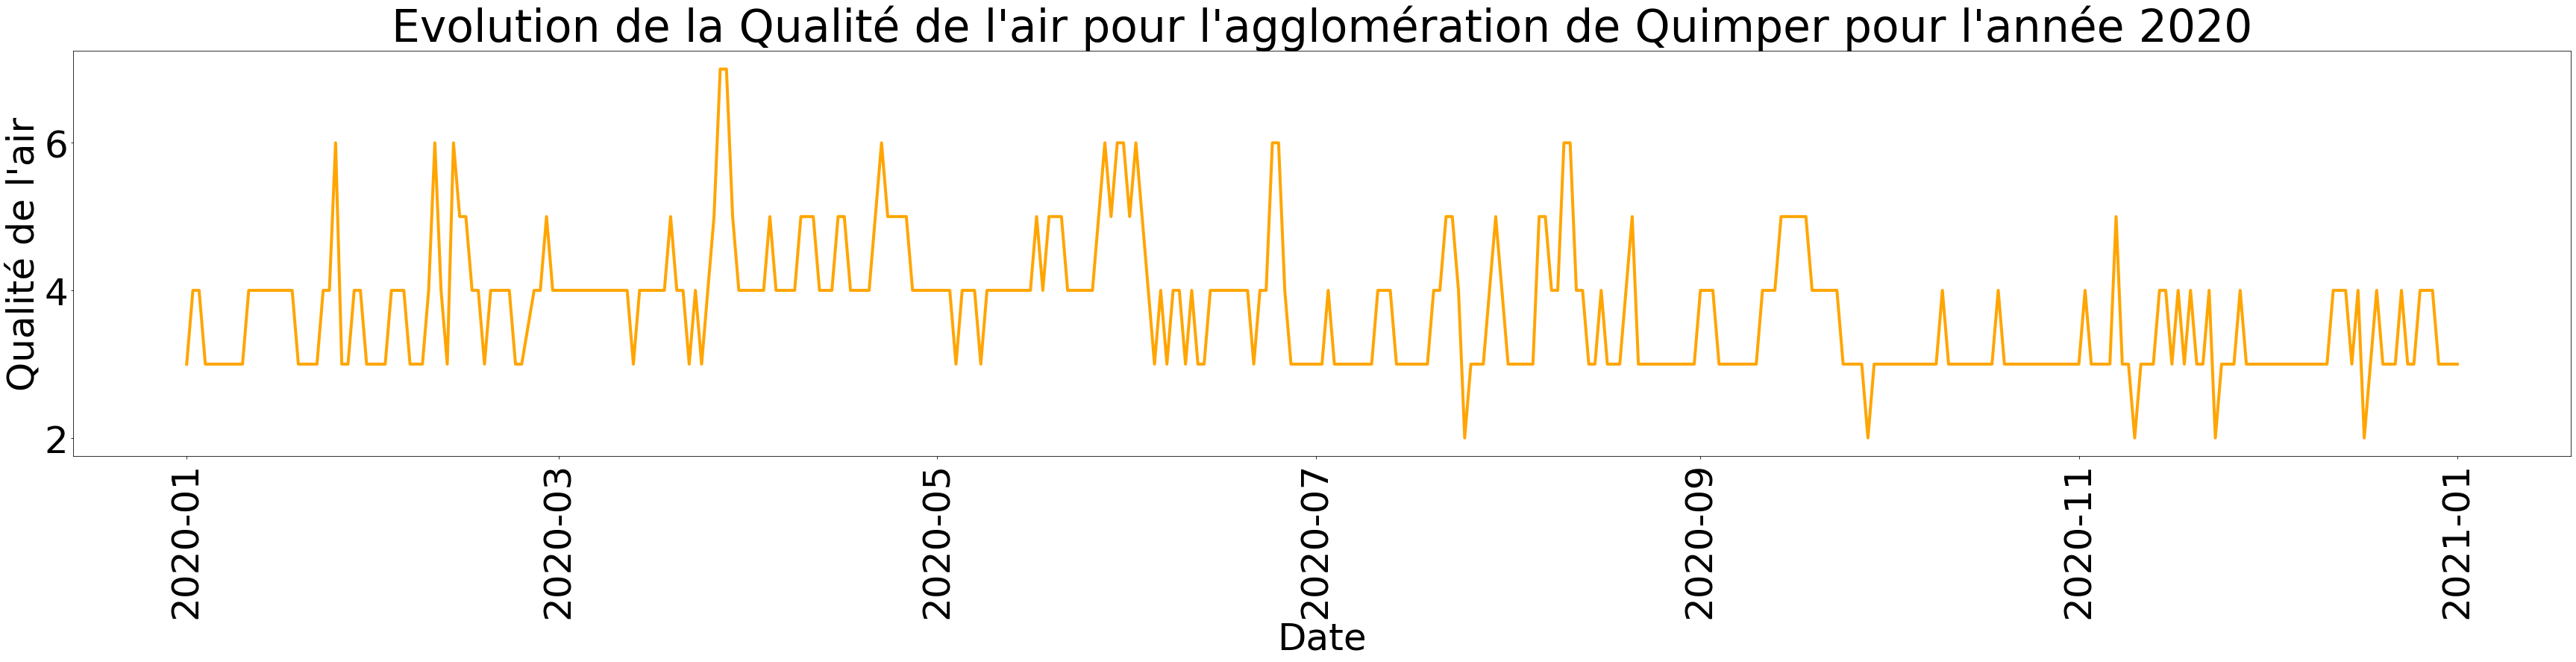

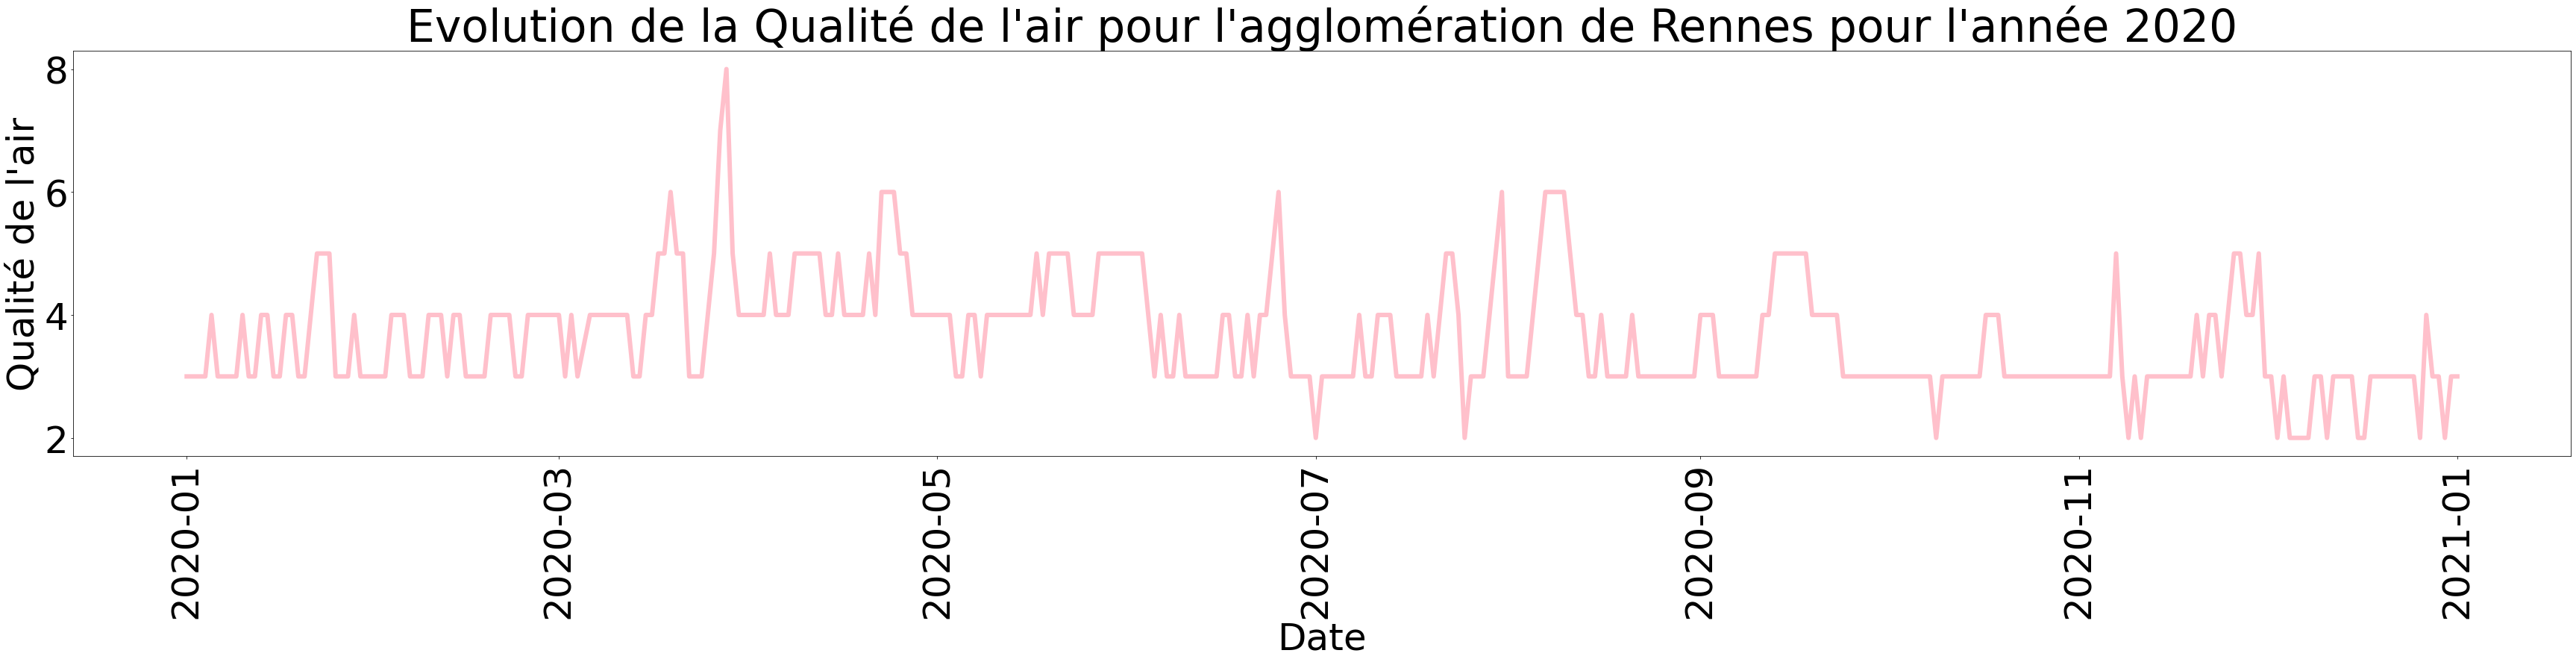

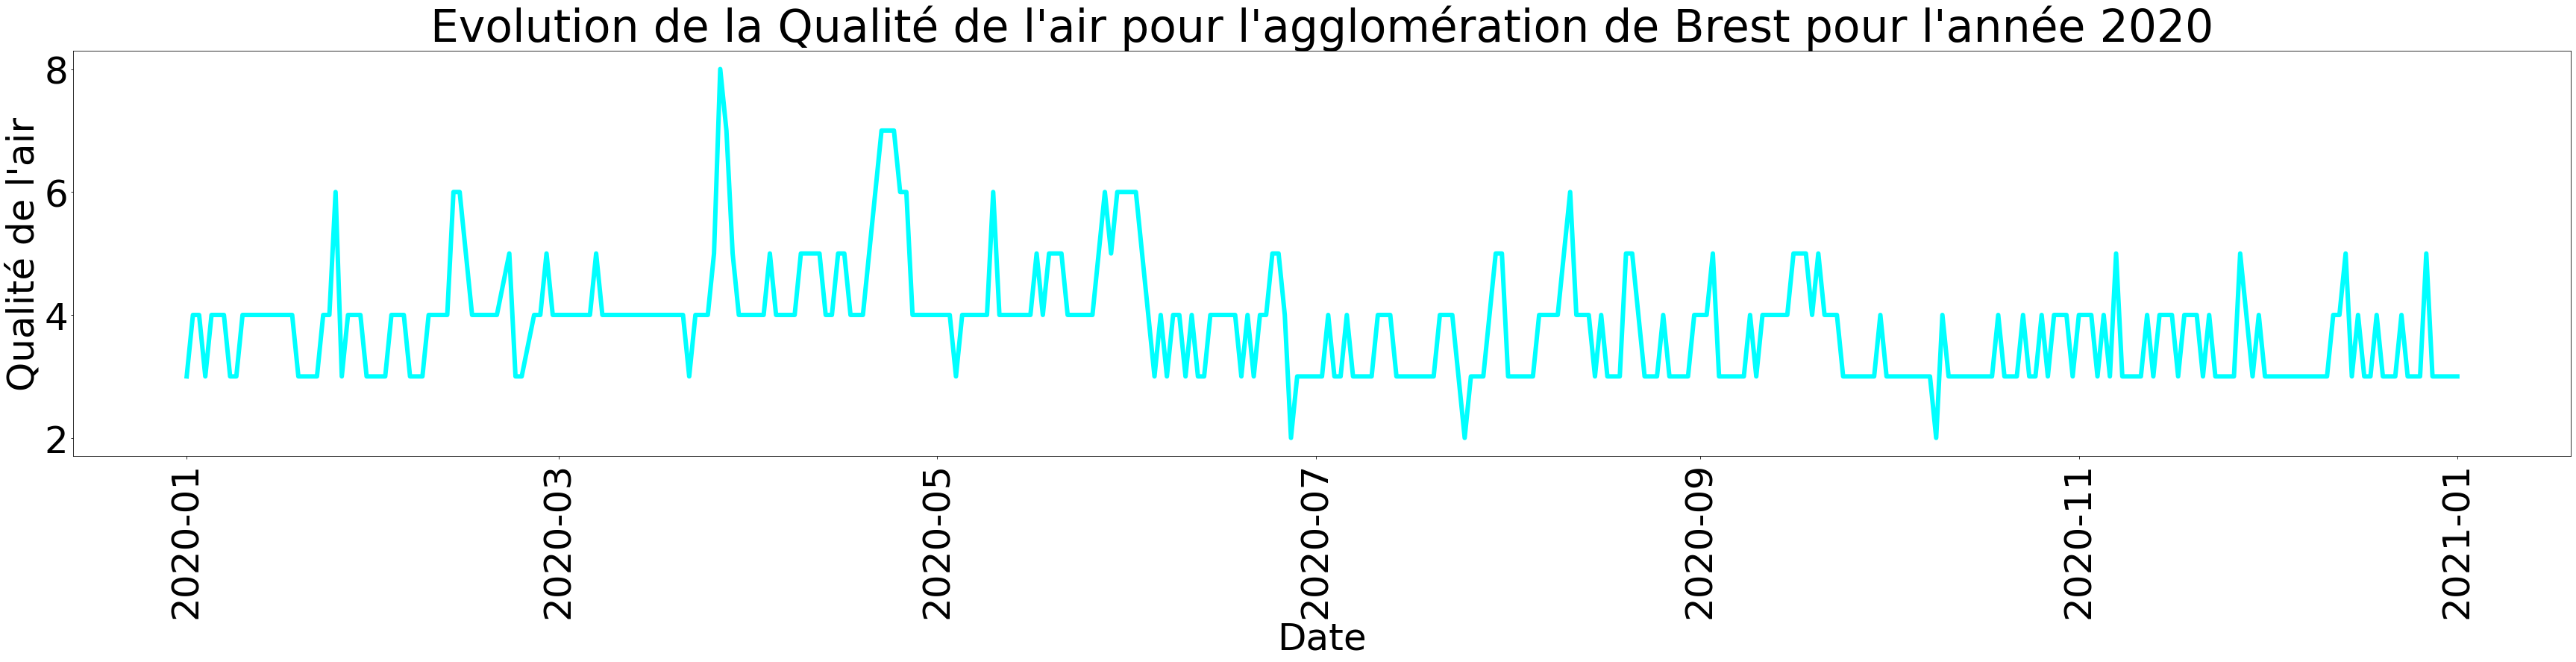

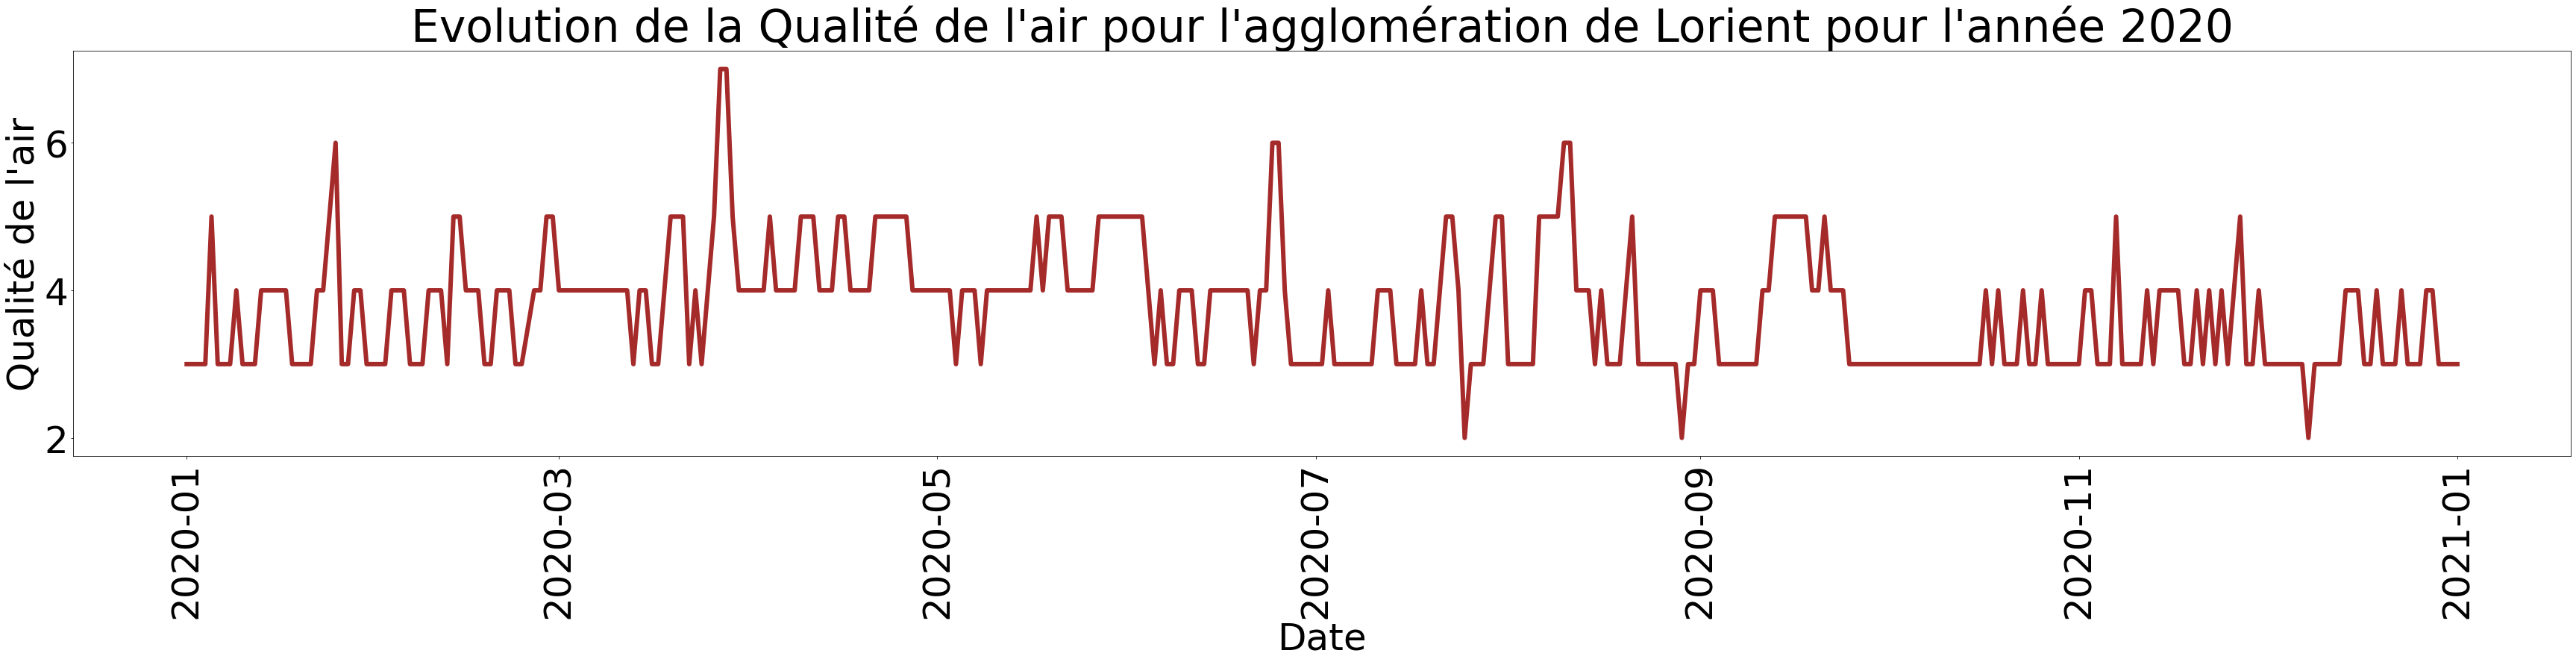

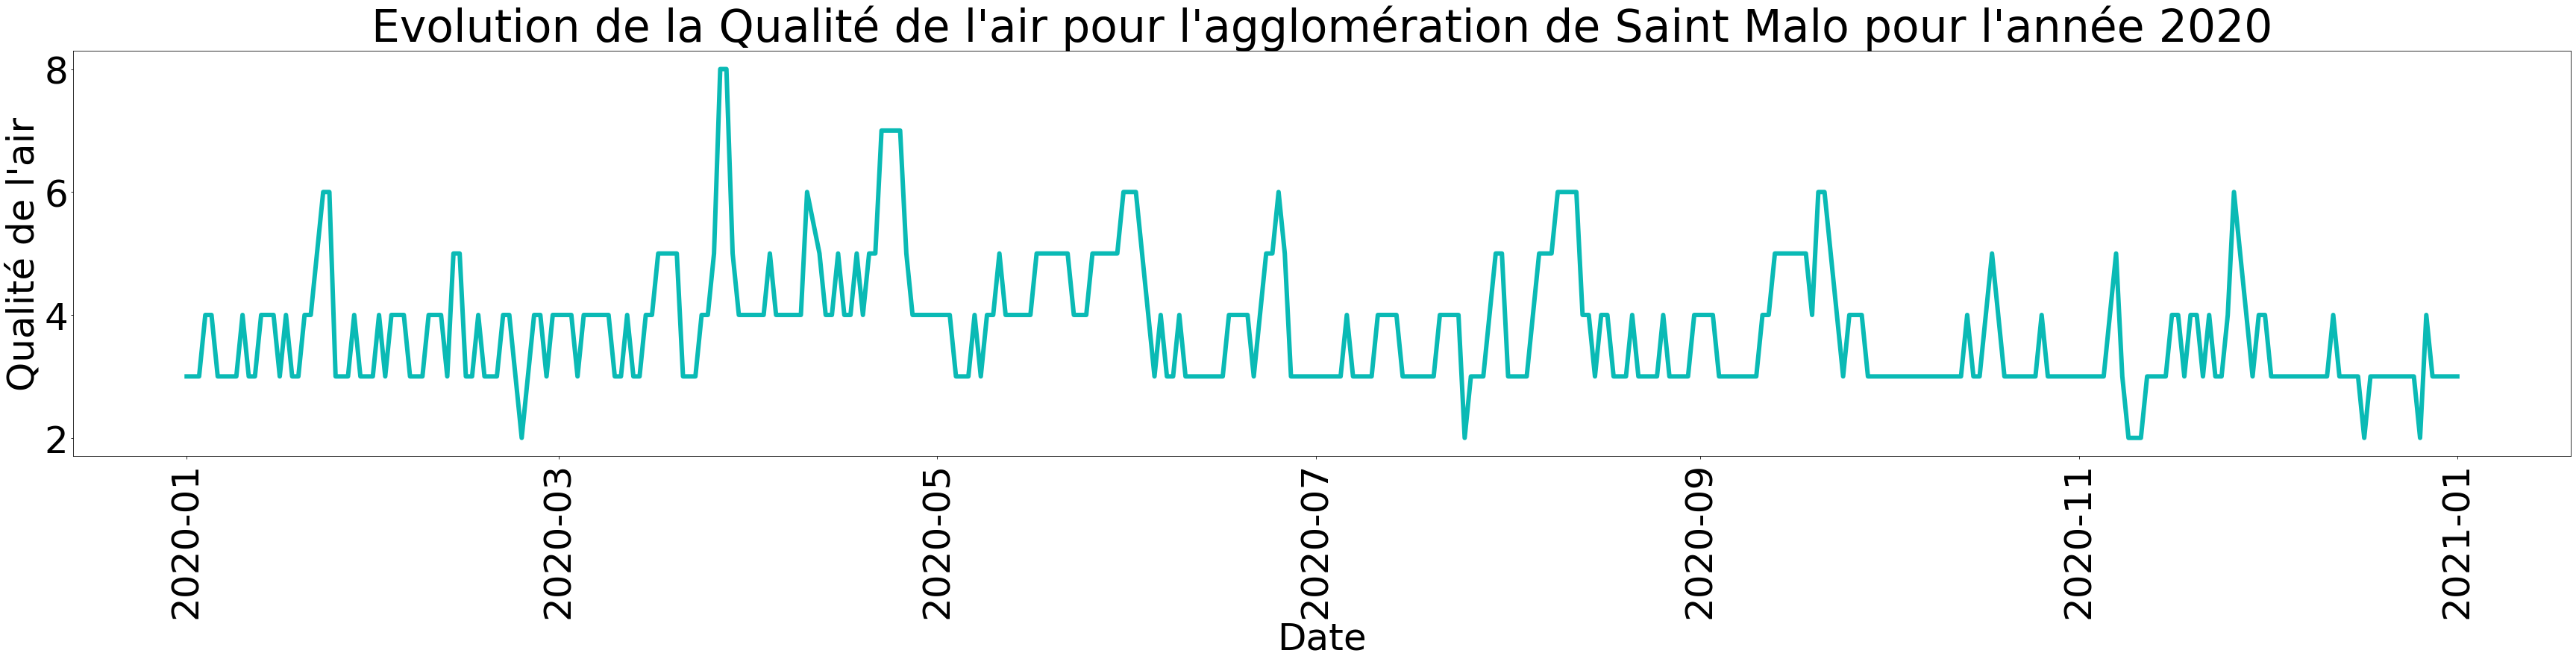

In [20]:


plt.title("Evolution de la Qualité de l'air pour l'agglomération de Saint Brieuc pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x = dataset1_quali_saint_brieuc['date']
y1 = dataset1_quali_saint_brieuc['valeur']
plt.plot(x, y1, color = 'red', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Evolution de la Qualité de l'air pour l'agglomération de Vannes pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x2 = dataset1_quali_morbi['date']
y2 = dataset1_quali_morbi['valeur']
plt.plot(x2, y2, color = 'green', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()

plt.title("Evolution de la Qualité de l'air pour l'agglomération de Quimper pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x3 = dataset1_quali_quimper['date']
y3 = dataset1_quali_quimper['valeur']
plt.plot(x3, y3, color = 'orange', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()

plt.title("Evolution de la Qualité de l'air pour l'agglomération de Rennes pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x4 = dataset1_quali_rennes['date']
y4 = dataset1_quali_rennes['valeur']
plt.plot(x4, y4, color = 'pink', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Evolution de la Qualité de l'air pour l'agglomération de Brest pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x5 = dataset1_quali_brest['date']
y5 = dataset1_quali_brest['valeur']
plt.plot(x5, y5, color = 'cyan', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Evolution de la Qualité de l'air pour l'agglomération de Lorient pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x6 = dataset1_quali_lorient['date']
y6 = dataset1_quali_lorient['valeur']
plt.plot(x6, y6, color = 'brown', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Evolution de la Qualité de l'air pour l'agglomération de Saint Malo pour l'année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x7 = dataset1_quali_malo['date']
y7 = dataset1_quali_malo['valeur']
plt.plot(x7, y7, color = '#0ABAB5', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


L'évolution de la qualité de l'air sur les sept agglomérations nous montre une dégradation de la qualité de l'air 
suite au premier confinement. En effet, nous constatons pour les sept zones un pic au cours du mois d'avril.

On aurait pu s'attendre à des résultats inverses avec un effet positif du confinement sur la qualité de l'air en Bretagne, 
en raison notamment d'une circulation routière trés limitée lors du premier confinement, entraînant des baisses significatives des concentrations en dioxyde d’azote 
sur l’ensemble de la Bretagne.

On remarque également que le deuxième n'a eu quasiment aucun effet sur la qualité de l'air. Ce phénomène peut être dû au
fait que les restrictions ont été moins importantes lors de ce deuxième confinement.

Afin de mieux comprendre cette dégradation de la qualité de l'air en Bretagne malgré le confinement, nous allons nous 
intérésser aux variables ayant une corrélation positive avec la qualité de l'air, à savoir val_o3 (ozone)et
val_pm10 (pour les particules fines de diamètre inférieur à 10µm). 

In [21]:
dataset1.groupby("lib_zone").mean()

,valeur,val_no2,val_so2,val_o3,val_pm10,val_pm25,Month
lib_zone,,,,,,,
Brest Métropole,3.819945,1.290859,0.0,3.598338,2.916898,0.0,6.578947
CA Golfe du Morbihan - Vannes,3.723288,1.263014,0.0,3.536986,2.632877,0.0,6.523288
CA Lorient,3.731507,1.246575,0.0,3.550685,2.687671,0.0,6.523288
CA Quimper Bretagne Occidentale,3.713115,1.150273,0.0,3.565574,2.655738,0.0,6.510929
CA Saint-Brieuc Armor,3.660274,1.235616,0.0,3.479452,2.641096,0.0,6.520548
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,1.181818,0.0,3.479339,3.011019,0.0,6.542700
Rennes Métropole,3.646409,1.439227,0.0,3.411602,2.748619,0.0,6.555249


En 2020, nous remarquons une valeur plus élévée du dioxyde d'azote pour l'agglomération de Rennes pouvant s'expliquer
par une circultaion très importantante dans cette zone qui est un carrefour stratégique en terme de transports de marchandises
notamment. 
Néanmoins, l'agglomération de Rennes est celle qui présente le meilleur indice de qualité de l'air globalement
sur l'année 2020.

pd.crosstab(dataset1.date, dataset1.val_o3)


<ipython-input-22-235f67b42868>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d1 = dataset1.groupby("date")["val_no2", "val_o3", "val_pm10"].agg([np.mean])


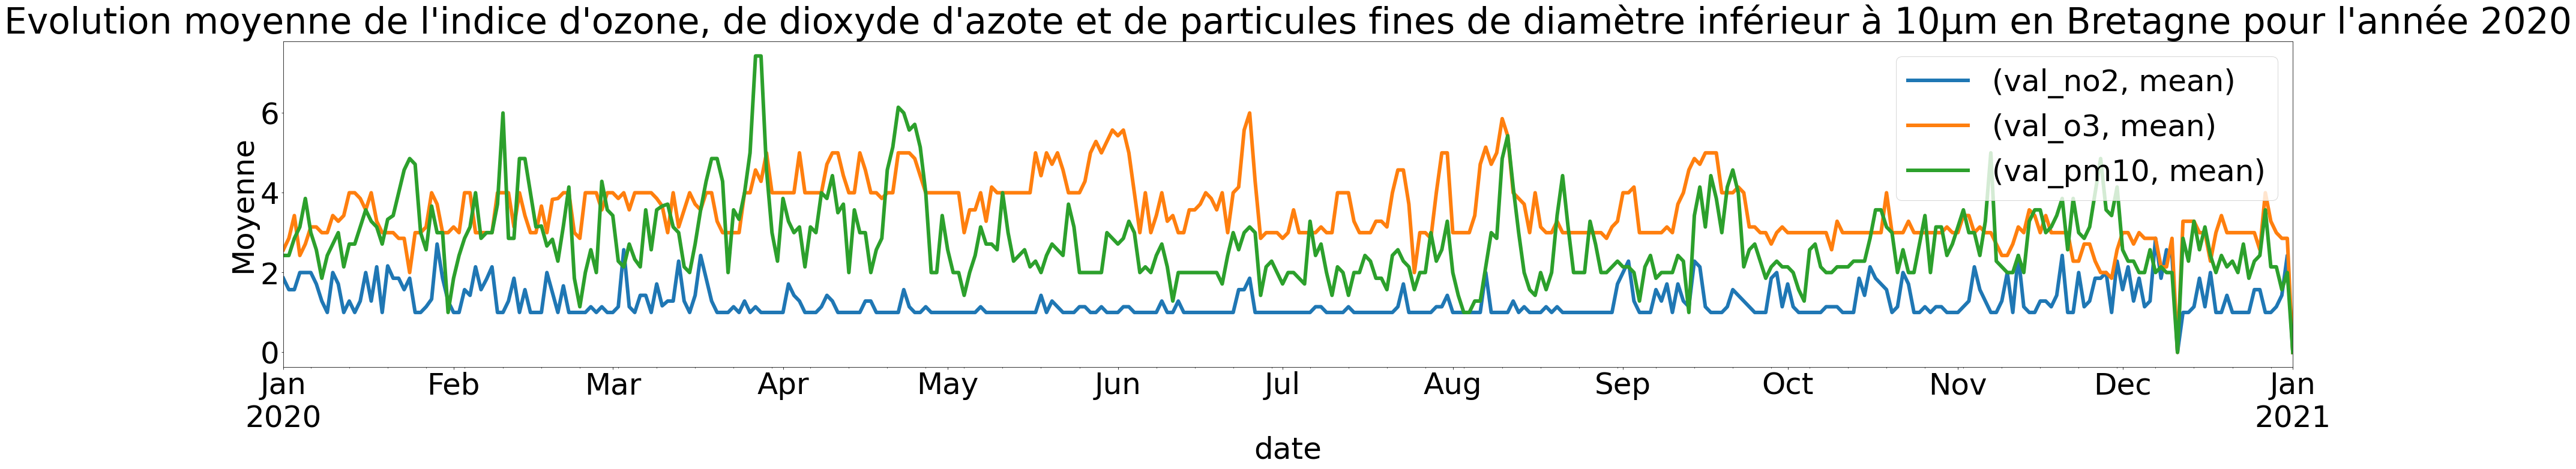

In [22]:

d1 = dataset1.groupby("date")["val_no2", "val_o3", "val_pm10"].agg([np.mean])
d1.plot(linewidth=6)
plt.title("Evolution moyenne de l'indice d'ozone, de dioxyde d'azote et de particules fines de diamètre inférieur à 10µm en Bretagne pour l'année 2020")
plt.ylabel("Moyenne")
plt.legend()

plt.show()




Même si la pollution au dioxyde d'azote a baissé lors du confinement, ce n'est pas le cas des particules fines
qui ont augmenté à la mi-mars. Ce phénomène peut s'expliquer par les conditions climatiques à cette époque de l'année.
En effet, normalement la météo permet de dissiper la pollution, mais en mars-avril les températures minimales sont
fraiches et les températures maximales élevées en journée.L'air chaud ne monte donc pas dans l'atmosphère, créant 
ainsi un couvercle dans l'atmoshère. Par conséquent,les concentrations au sol en particules fines s'accumulent 
et ne se dispersent pas. De plus cette periode coorespond à une période d'épandage dans les champs et l'utilisation
du chauffage chez les particuliers, notamment au bois ne fait q'accroître les choses.  




In [23]:
t = pd.crosstab(dataset1.valeur, dataset1.lib_zone)
t

lib_zone,Brest Métropole,CA Golfe du Morbihan - Vannes,CA Lorient,CA Quimper Bretagne Occidentale,CA Saint-Brieuc Armor,CA du Pays de Saint-Malo (Saint-Malo Agglomération),Rennes Métropole
valeur,,,,,,,
2,3,5,3,5,10,7,15
3,138,159,161,162,186,169,173
4,165,143,141,148,111,120,114
5,37,50,53,37,42,47,48
6,13,6,5,12,10,14,10
7,4,2,2,2,4,4,1
8,1,0,0,0,2,2,1


# Préparation des données pour la cartographie

Il faut dans un premier temps, séparer les ccordonnées géographiques de la colonne **geom** afin de récupérer
la longitude et la latitude.

In [24]:
longitude, latitude = [], []
for col, row, in dataset1['geom'].iteritems():
    long = row.split('(')[1].split(' ')[0]
    lat = row.split('(')[1].split(' ')[1].split(')')[0]
    longitude.append(long)
    latitude.append(lat)

dataset1.insert(2, 'Longitude93', longitude, True)
dataset1.insert(3, 'Latitude93', latitude, True)

#Les variables "Longitude" et "Latitude" sont de type objet. On va donc les transformaer en float.
dataset1['Longitude93'] = dataset1['Longitude93'].astype('float32')
dataset1['Latitude93'] = dataset1['Latitude93'].astype('float32')

dataset1.drop(['Longitude93', 'Latitude93'], axis=1)
#dataset1.info()
dataset1



,date,valeur,Longitude93,Latitude93,qualif,type_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,Month
0,2021-01-01,3,269153.281250,6832825.0,Bon,EPCI,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
1,2021-01-01,3,269961.125000,6746308.0,Bon,EPCI,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,1
2,2021-01-01,3,172753.625000,6795400.5,Bon,EPCI,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,1
3,2021-01-01,3,349555.000000,6789093.5,Bon,EPCI,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,1
4,2021-01-01,3,338719.750000,6844014.0,Bon,EPCI,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2020-01-01,3,269153.281250,6832825.0,Bon,EPCI,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,1
2543,2020-01-01,3,172753.625000,6795400.5,Bon,EPCI,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600,1
2544,2020-01-01,3,229772.046875,6768640.0,Bon,EPCI,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600,1
2545,2020-01-01,3,338719.750000,6844014.0,Bon,EPCI,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600,1


In [25]:
#dataset1 = dataset1.drop(['Longitude93', 'Latitude93'], axis=1)
#dataset1

In [26]:
#on regroupe les données par région en prenant la moyenne
# Agrégation des coordonnées
datasetcarte = dataset1.groupby(by=['lib_zone']).mean()
datasetcarte


,valeur,Longitude93,Latitude93,val_no2,val_so2,val_o3,val_pm10,val_pm25,Month
lib_zone,,,,,,,,,
Brest Métropole,3.819945,147878.218750,6837176.0,1.290859,0.0,3.598338,2.916898,0.0,6.578947
CA Golfe du Morbihan - Vannes,3.723288,269961.125000,6746308.0,1.263014,0.0,3.536986,2.632877,0.0,6.523288
CA Lorient,3.731507,229772.046875,6768640.0,1.246575,0.0,3.550685,2.687671,0.0,6.523288
CA Quimper Bretagne Occidentale,3.713115,172753.625000,6795400.5,1.150273,0.0,3.565574,2.655738,0.0,6.510929
CA Saint-Brieuc Armor,3.660274,269153.281250,6832825.0,1.235616,0.0,3.479452,2.641096,0.0,6.520548
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,338719.750000,6844014.0,1.181818,0.0,3.479339,3.011019,0.0,6.542700
Rennes Métropole,3.646409,349555.000000,6789093.5,1.439227,0.0,3.411602,2.748619,0.0,6.555249


Nos coordonnées géographiques sont en projection Lambert 93 (EPSG : 2154), il faut donc les transformer en longitude
et latitude pour les exploiter. 

In [27]:
Long=[]
Lat=[]
inProj = Proj(init='epsg:2154')
outProj = Proj(init='epsg:4326')


for coord in dataset1['geom']:
    temp_string = coord
    coord=[float(s) for s in re.findall(r'-?\d+\.?\d*', temp_string)]
    x1,y1 = coord[0],coord[1]
    x2,y2 = transform(inProj,outProj,x1,y1)
    Long.append(x2)
    Lat.append(y2)

dataset1['Longitude']=Long
dataset1['Latitude']=Lat
dataset1.head()


C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\utilisateur\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making

,date,valeur,Longitude93,Latitude93,qualif,type_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,Month,Longitude,Latitude
0,2021-01-01,3,269153.28125,6832825.0,Bon,EPCI,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,1,-2.832059,48.452434
1,2021-01-01,3,269961.12500,6746308.0,Bon,EPCI,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,1,-2.736238,47.676516
2,2021-01-01,3,172753.62500,6795400.5,Bon,EPCI,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,1,-4.085219,48.045952
3,2021-01-01,3,349555.00000,6789093.5,Bon,EPCI,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,1,-1.711339,48.108092
4,2021-01-01,3,338719.75000,6844014.0,Bon,EPCI,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,1,-1.902423,48.595360


In [28]:
#on regroupe les données par région en prenant la moyenne
# Agrégation des coordonnées
datasetcarte = dataset1.groupby(by=['lib_zone']).mean()
datasetcarte


,valeur,Longitude93,Latitude93,val_no2,val_so2,val_o3,val_pm10,val_pm25,Month,Longitude,Latitude
lib_zone,,,,,,,,,,,
Brest Métropole,3.819945,147878.218750,6837176.0,1.290859,0.0,3.598338,2.916898,0.0,6.578947,-4.470520,48.399641
CA Golfe du Morbihan - Vannes,3.723288,269961.125000,6746308.0,1.263014,0.0,3.536986,2.632877,0.0,6.523288,-2.736238,47.676516
CA Lorient,3.731507,229772.046875,6768640.0,1.246575,0.0,3.550685,2.687671,0.0,6.523288,-3.293846,47.849403
CA Quimper Bretagne Occidentale,3.713115,172753.625000,6795400.5,1.150273,0.0,3.565574,2.655738,0.0,6.510929,-4.085219,48.045952
CA Saint-Brieuc Armor,3.660274,269153.281250,6832825.0,1.235616,0.0,3.479452,2.641096,0.0,6.520548,-2.832059,48.452434
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,338719.750000,6844014.0,1.181818,0.0,3.479339,3.011019,0.0,6.542700,-1.902423,48.595360
Rennes Métropole,3.646409,349555.000000,6789093.5,1.439227,0.0,3.411602,2.748619,0.0,6.555249,-1.711339,48.108092


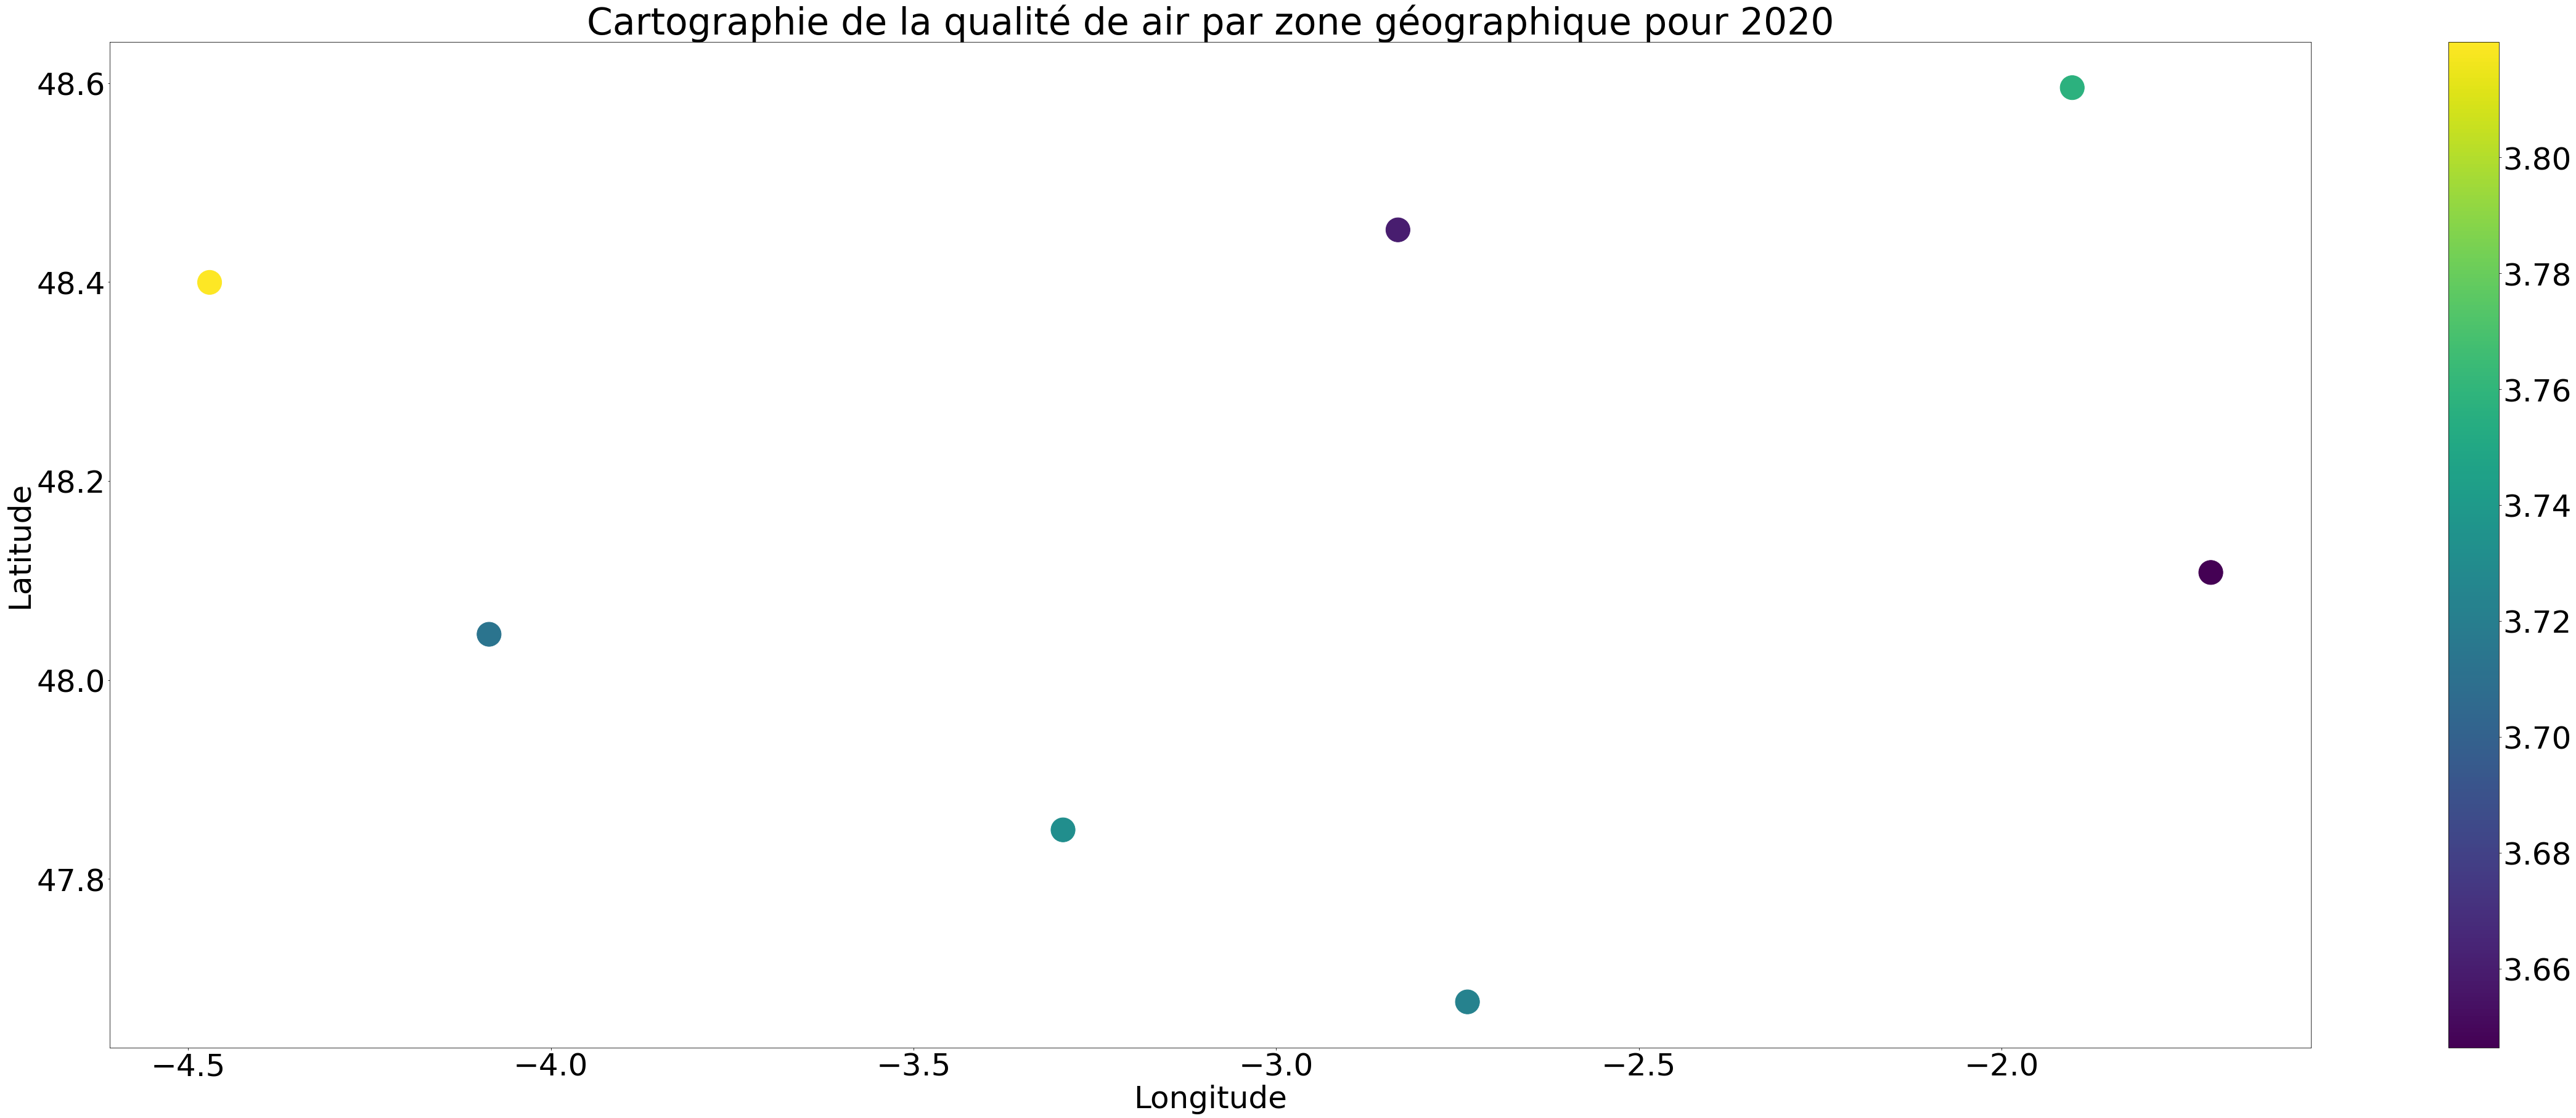

In [30]:

plt.figure(figsize=(80,30))
plt.scatter(datasetcarte['Longitude'],datasetcarte['Latitude'],c=datasetcarte['valeur'], s = 1530)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cartographie de la qualité de air par zone géographique pour 2020')
plt.show()



Chaque point correspond à la valeur moyenne de la qualité de l'air sur chacune des zones étudiées. ces points sont
placés en fonction de leur coordonnées géographiques (Longitude, Latitude)


### Visualisation des données de qualité d'air sur une carte

Text(0, 0.5, 'latitude')

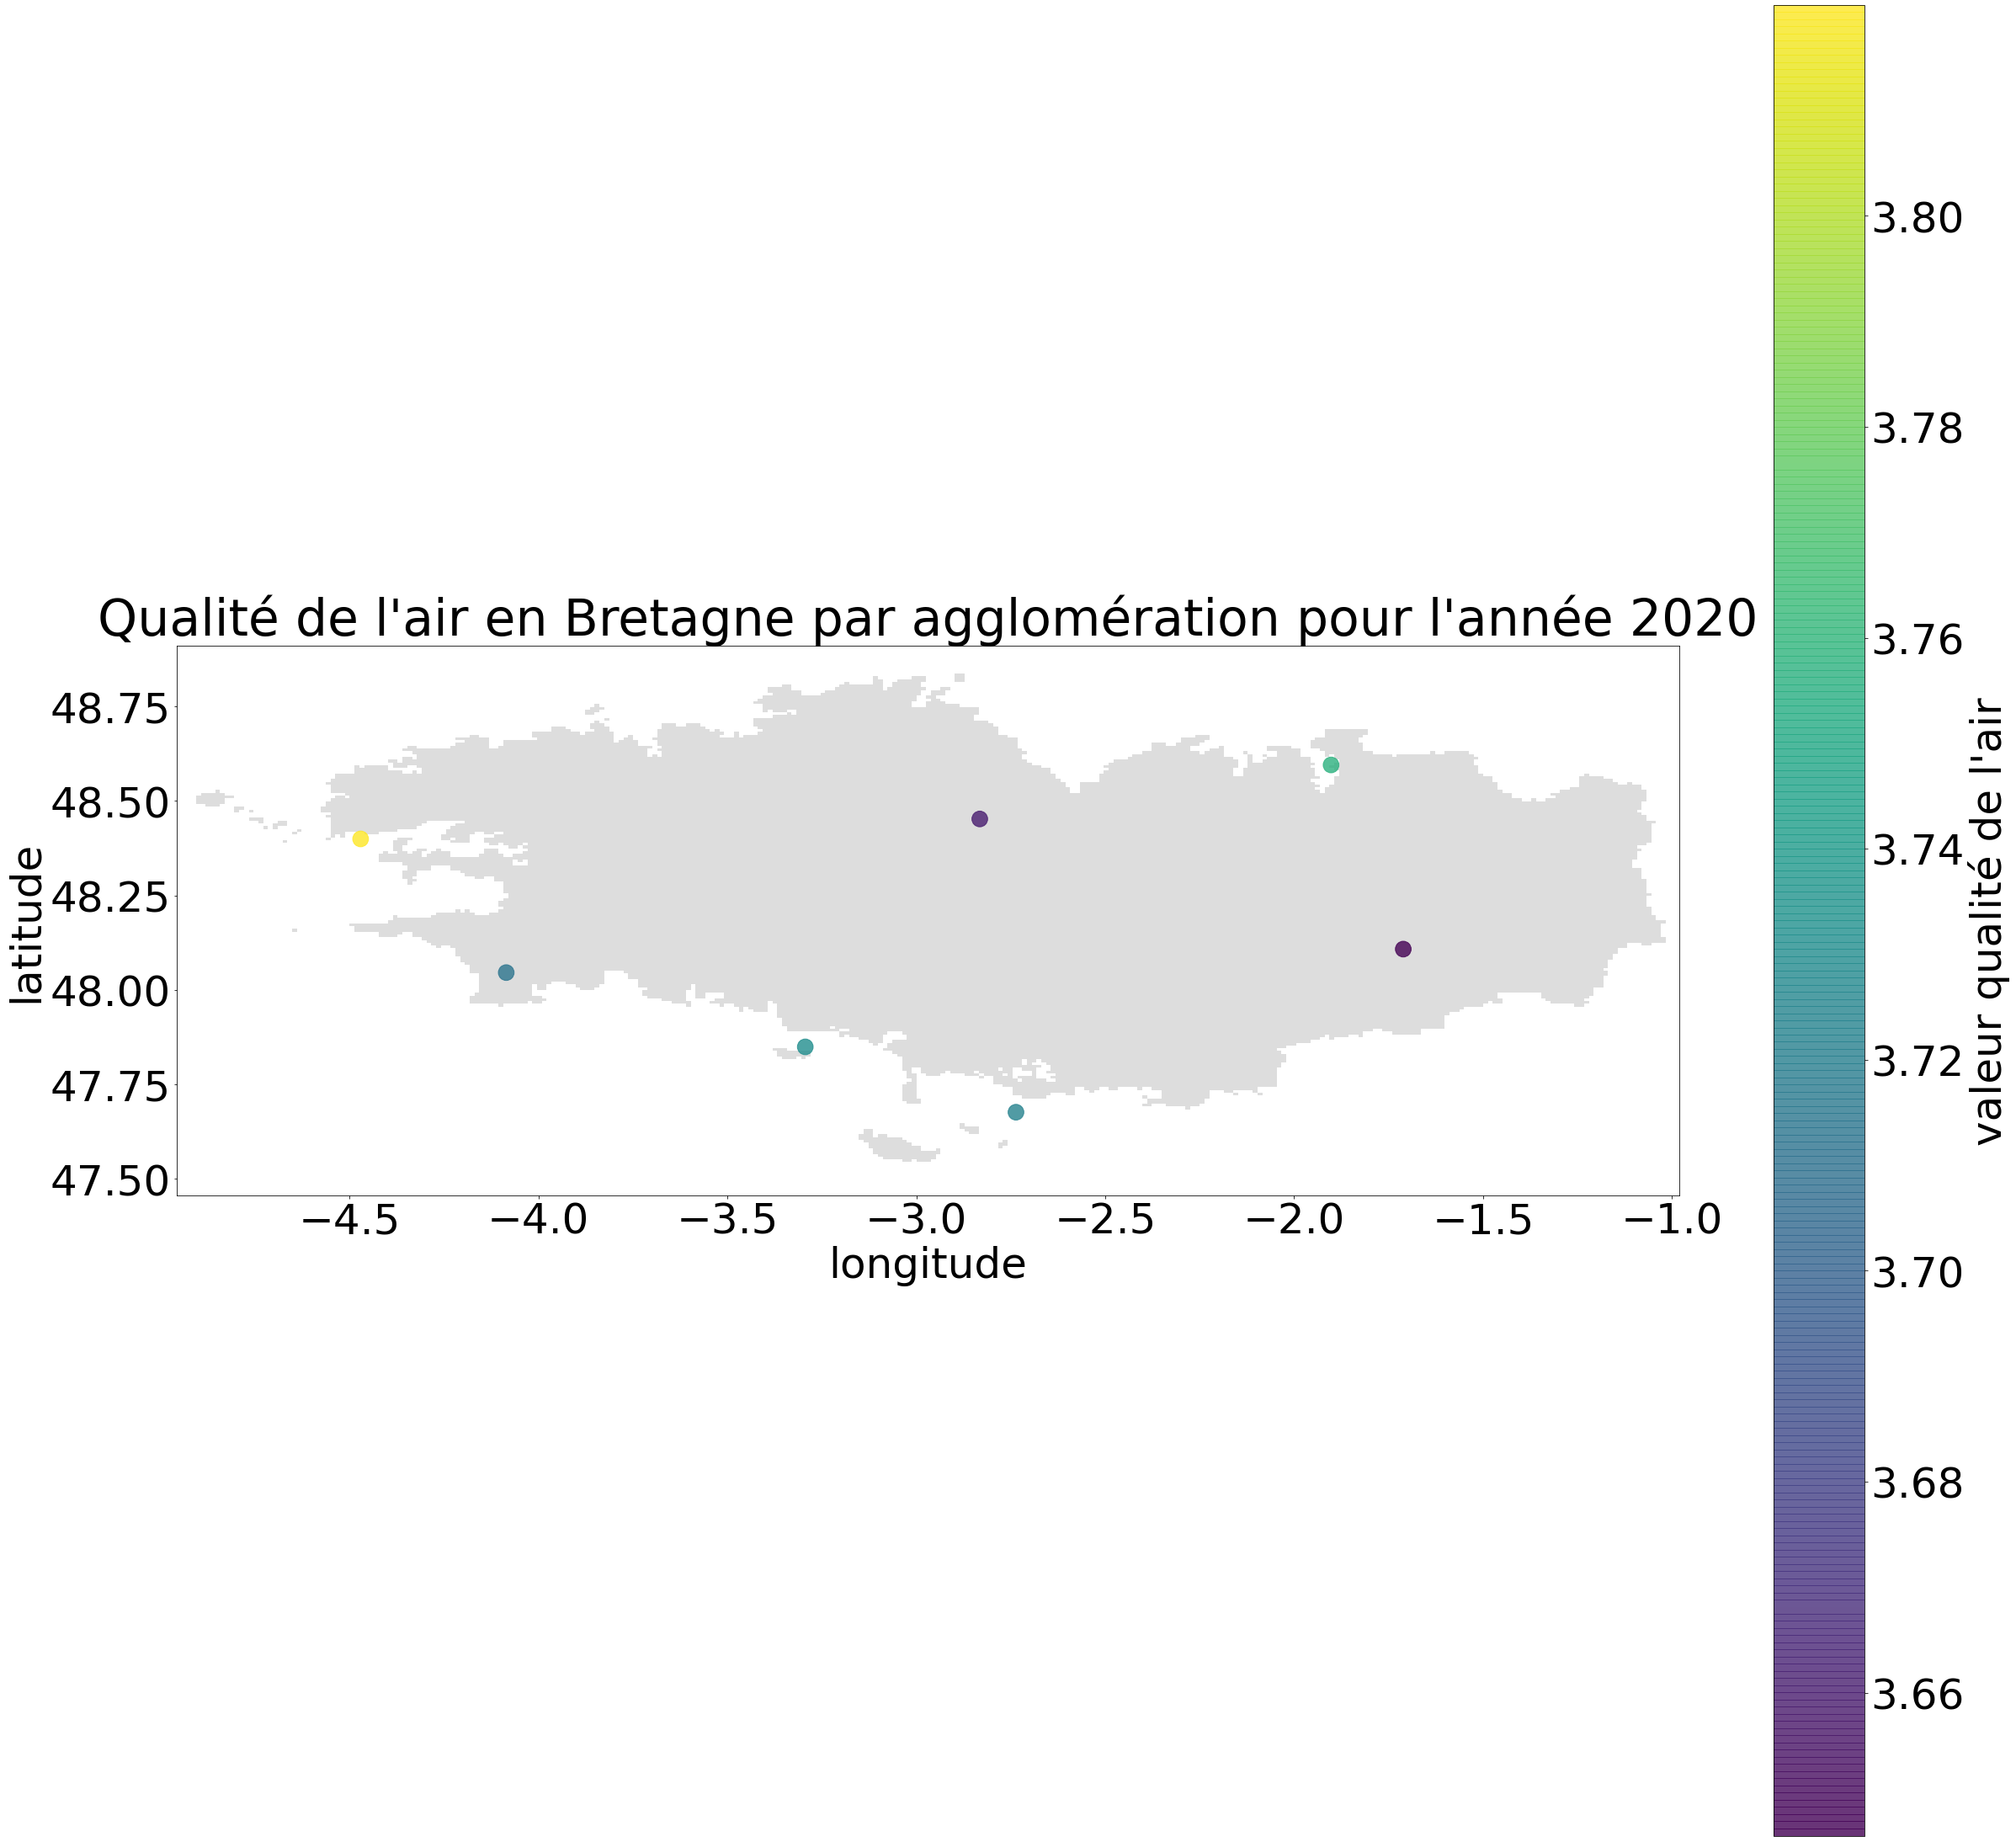

In [39]:
plt.figure(figsize=(40,40))

bretagne=plt.imread("carte3.png")
plt.imshow(bretagne,zorder=0 , extent=[-4.958,-0.9805,47.4567,48.9100])

plt.scatter(datasetcarte['Longitude'],datasetcarte['Latitude'],alpha=0.8,c=datasetcarte['valeur'],s = 350,
            cmap = plt.get_cmap ('viridis'))
plt.colorbar(label="valeur qualité de l'air")
plt.xlabel("longitude")
plt.title("Qualité de l'air en Bretagne par agglomération pour l'année 2020")
plt.ylabel("latitude")

# conclusion

Contrairement à ce que l'on aurait pu penser, le confinement n'a pas entraîné de réels impacts positifs sur la qualité
de l'air en Bretagne lors de cette période.

Malgré une baisse significative du taux de dioxyde d'azote qui a été observée sur l'ensemble des agglomérations
bretonnes, liée à une réduction importante de la circulation routère, la qualité de l'air a connu une détérioration
lors du premier confinement (Mars et avril 2020).

Lors du premier confinement, on a onservé un pic au niveau des particules fines de diamètre inférieur à 10µm.
Ce phénomène peut s'expliquer non seulement, par les conditions météorologiques particulières pendant la période de confinement, 
maintenant les particules fines au sol mais également par l’augmentation des émissions dans d’autres secteurs 
non touchés par les restrictions d’activités liées au confinement (agriculture notamment, avec une période 
    d'épandages massives).

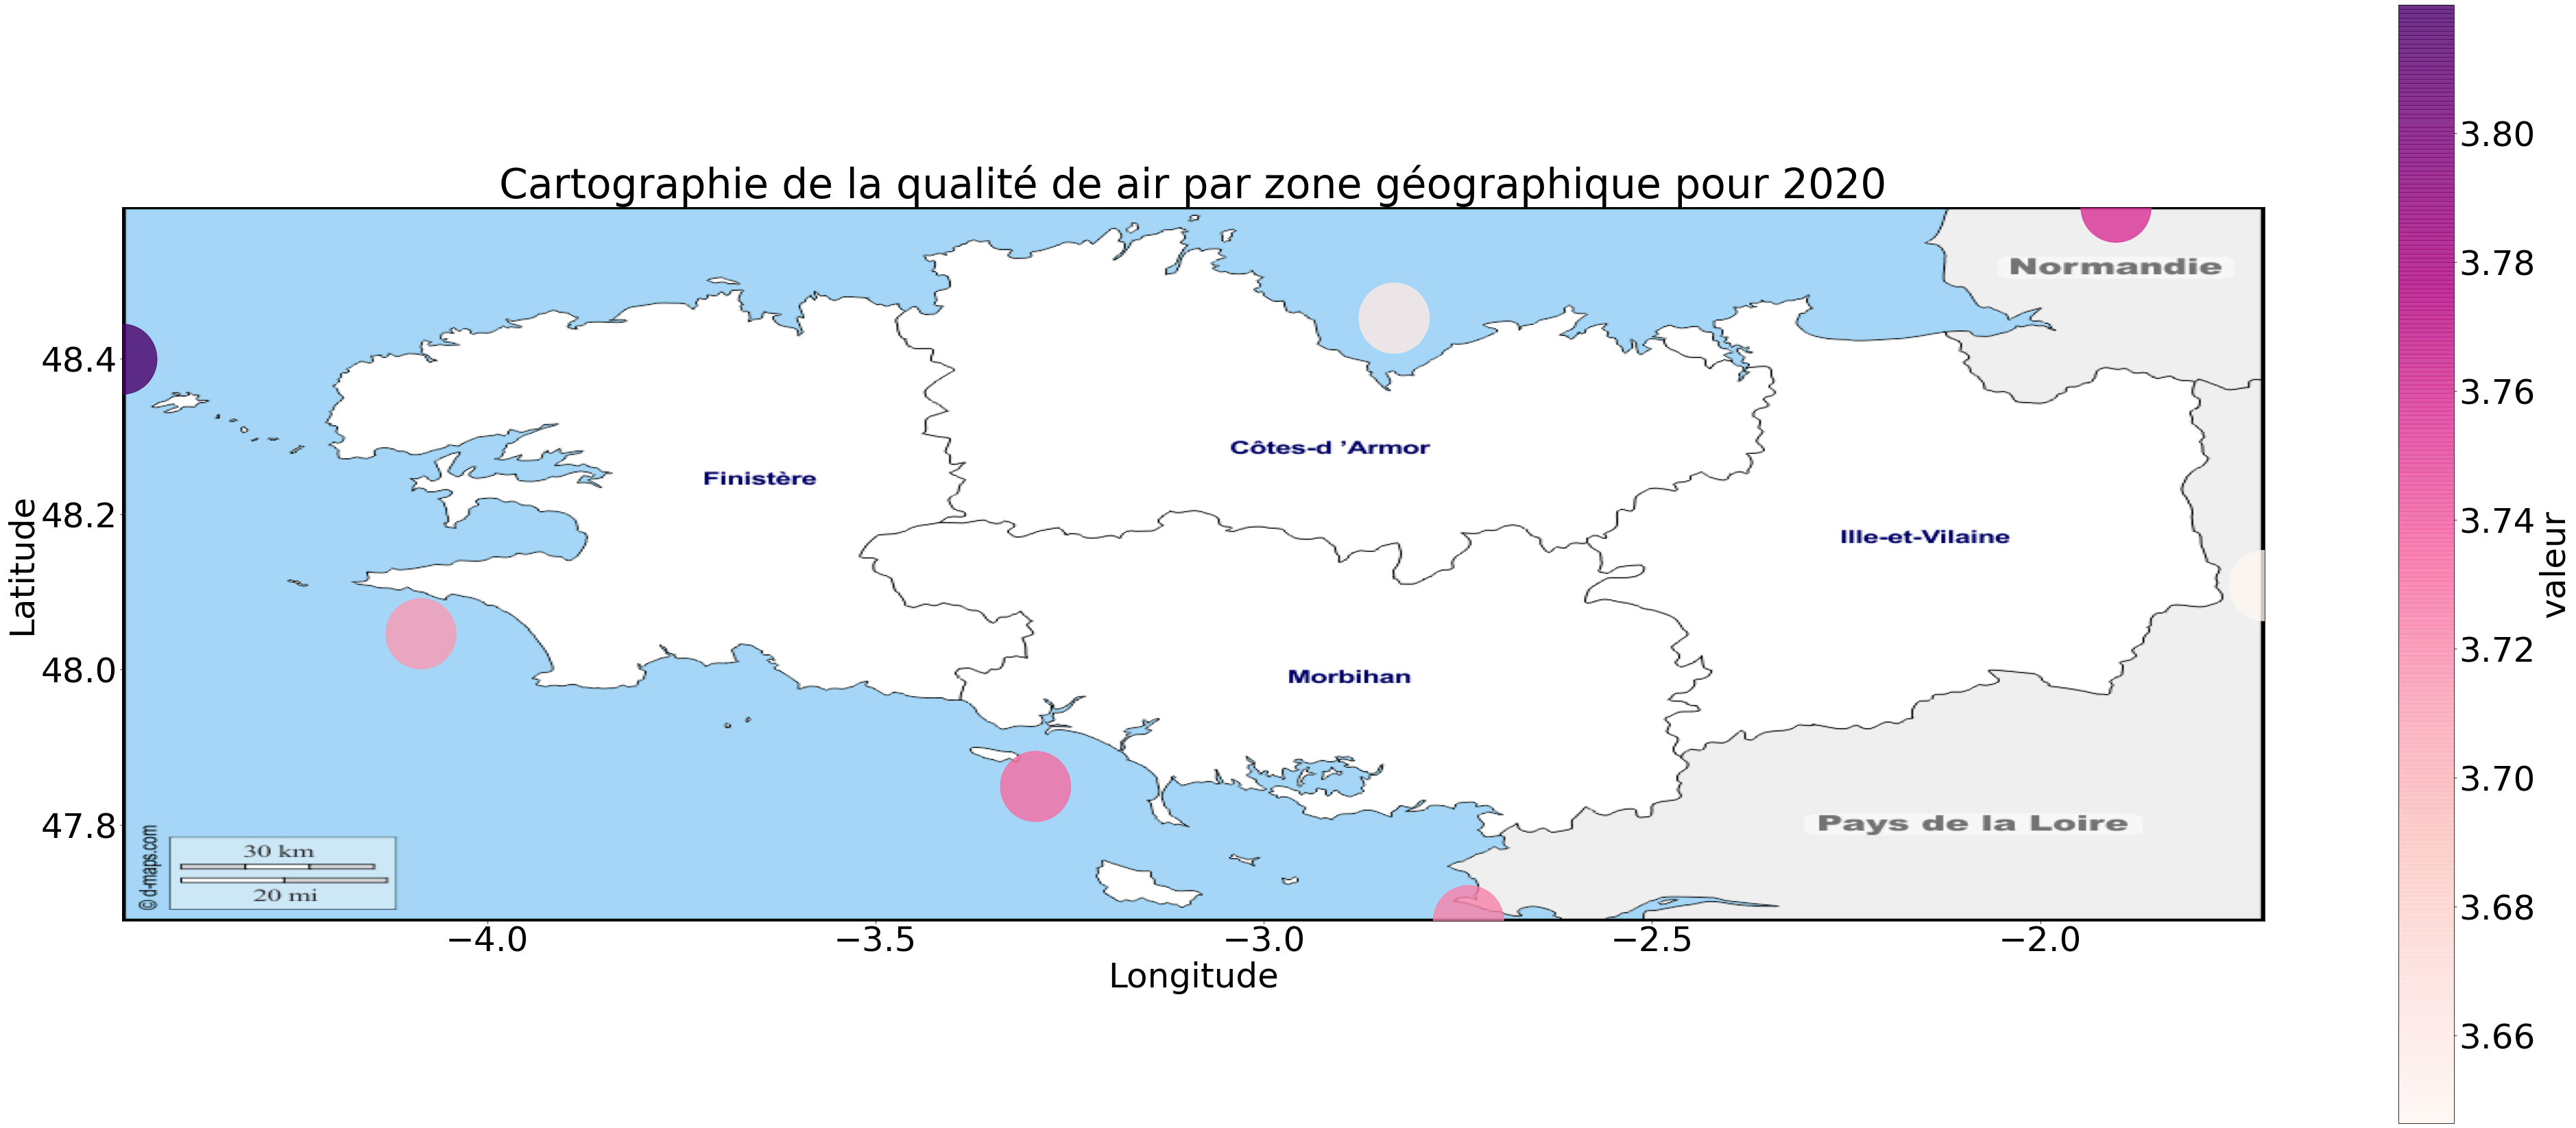

In [34]:
image = plt.imread('carte2.gif')
fig, ax = plt.subplots(figsize = (60,40))

ax.imshow(image,zorder=0,extent=[datasetcarte['Longitude'].min(), datasetcarte['Longitude'].max(), datasetcarte['Latitude'].min(), datasetcarte['Latitude'].max()])



datasetcarte.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', alpha=0.8, 
             c='valeur', s = 10530, cmap=plt.get_cmap('RdPu'), colorbar=True, figsize=(70,30), zorder=1)

plt.title('Cartographie de la qualité de air par zone géographique pour 2020')
plt.show()
